In [95]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

import lightgbm as lgb
from sklearn.metrics import log_loss, f1_score, accuracy_score
from sklearn.model_selection import train_test_split


In [96]:
rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## Load dataset

In [97]:
data_dir = Path('C:\DACON\/titanic\dataset')
build_dir = Path('C:\DACON\/titanic\/build')
feature_dir = Path('C:\DACON\/titanic\/build\/feature')

class_file = feature_dir / 'class.csv'
one_hot_file = feature_dir / 'one_hot.csv'
sample_file = data_dir / 'submission.csv'

seed = 23

In [98]:
algo_name = 'lgb'
feature_name = 'class'
model_name = f'{algo_name}_{feature_name}'

# feature_file = feature_dir / f'{feature_name}.csv'
class_sub_file = build_dir / f'{model_name}.csv'
print(class_sub_file)

C:\DACON\titanic\build\lgb_class.csv


In [99]:
algo_name = 'lgb'
feature_name = 'one_hot'
model_name = f'{algo_name}_{feature_name}'

one_hot_sub_file = build_dir / f'{model_name}.csv'
print(one_hot_sub_file)

C:\DACON\titanic\build\lgb_one_hot.csv


df = train 891 rows + test 418 rows(with no 'Survived' value)

In [119]:
class_df = pd.read_csv(class_file, index_col=0)
one_hot_df = pd.read_csv(one_hot_file, index_col=0)

print(class_df.shape, one_hot_df.shape)

ntrn = 891
ntst = 418
target_col = 'Survived'

one_hot_df.head()

(1309, 8) (1309, 30)


,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,Family_0,Family_1,Family_2
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,1.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
5,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


## Split data into train/validation/test

In [101]:
# Change THESE!
df = class_df # one_hot_df
sub_file = class_sub_file # one_hot_sub_file 

y = df[target_col][:ntrn]
df.drop(target_col, axis=1, inplace=True)
features = df.columns.to_list()

trn = df[features][:ntrn]
tst = df[features][ntrn:]
print(y.shape, df.shape)

(891,) (1309, 29)


In [102]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(712, 29) (179, 29) (712,) (179,)


## Model train

In [103]:
clf = lgb.LGBMClassifier(# objective='binary',  # Add objective
                         n_estimators=1000,
                         num_leaves=64,
                         learning_rate=0.05,
                         min_child_samples=10,
                         subsample=.5,
                         subsample_freq=1,
                         colsample_bytree=.8,
                         random_state=seed,
                         n_jobs=-1)
clf.fit(X_trn, y_trn,
        eval_set=[(X_val, y_val)],
        eval_metric = 'accuracy_score', #'log_loss',
        early_stopping_rounds=20)
p_val = clf.predict(X_val)
p_tst = clf.predict(tst)

[1]	valid_0's binary_logloss: 0.634737
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.616881
[3]	valid_0's binary_logloss: 0.600096
[4]	valid_0's binary_logloss: 0.586654
[5]	valid_0's binary_logloss: 0.572275
[6]	valid_0's binary_logloss: 0.556988
[7]	valid_0's binary_logloss: 0.544816
[8]	valid_0's binary_logloss: 0.534348
[9]	valid_0's binary_logloss: 0.525456
[10]	valid_0's binary_logloss: 0.515915
[11]	valid_0's binary_logloss: 0.509823
[12]	valid_0's binary_logloss: 0.502689
[13]	valid_0's binary_logloss: 0.496164
[14]	valid_0's binary_logloss: 0.489099
[15]	valid_0's binary_logloss: 0.48365
[16]	valid_0's binary_logloss: 0.478607
[17]	valid_0's binary_logloss: 0.473512
[18]	valid_0's binary_logloss: 0.470446
[19]	valid_0's binary_logloss: 0.466481
[20]	valid_0's binary_logloss: 0.461702
[21]	valid_0's binary_logloss: 0.458401
[22]	valid_0's binary_logloss: 0.45632
[23]	valid_0's binary_logloss: 0.452355
[24]	valid_0's binary_logloss:

In [104]:
print(p_tst[:10])

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


In [105]:
print('accuracy_score:', f'{accuracy_score(y_val, p_val):.4f}')
print('log_loss:', f'{log_loss(y_val, p_val):.4f}')
print('f1_score:', f'{f1_score(y_val, p_val):.4f}')

accuracy_score: 0.8045
log_loss: 6.7534
f1_score: 0.6847


## Visualize feature importance

<AxesSubplot:ylabel='feature'>

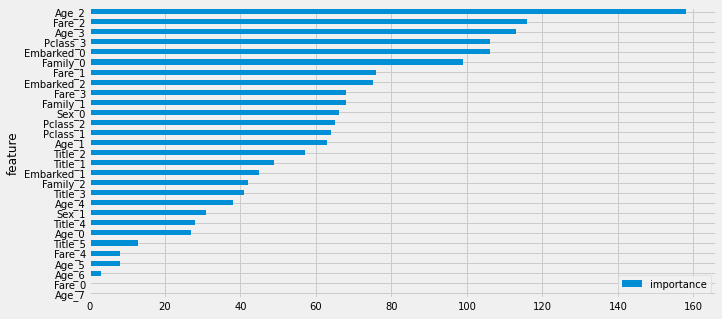

In [118]:
plt.rcParams.update({'font.size': 10})
imp = pd.DataFrame({'feature': trn.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

## Compare the prediction with the ground-truth

In [107]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [108]:
y_tst = sub['Survived']

In [109]:
print('accuracy_score:', f'{accuracy_score(y_tst, p_tst):.4f}')
print('log_loss:', f'{log_loss(y_tst, p_tst):.4f}')
print('f1_score:', f'{f1_score(y_tst, p_tst):.4f}')

accuracy_score: 0.8804
log_loss: 4.1315
f1_score: 0.8311


In [110]:
sub[target_col] = p_tst
sub.to_csv(sub_file)